In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from textblob import TextBlob

import random
random.seed (1)

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

# print (train.shape)
# print (test.shape)

# pd.set_option('display.max_colwidth', 1000)

# print (train.head(2))

# print (test.head(2))

# print (train.label.value_counts())
# print ()
# print (train.label.value_counts(normalize =True))

X = train.tweet
y = train.label
# print (X.shape)
# print ()
# print (y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
# print (X_train.shape)
# print (X_test.shape)
# print (y_train.shape)
# print (y_test.shape)

C:\Users\9020\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
vect = CountVectorizer(stop_words='english')
X_traindata_dtm = vect.fit_transform(train.tweet)
nb = MultinomialNB()
nb.fit(X_traindata_dtm, train.label)
X_testdata_dtm = vect.transform(test.tweet)
y_pred_prob_mu = nb.predict_proba(X_testdata_dtm)[:, 1]
y_pred_class_mu = nb.predict(X_testdata_dtm)

vect = CountVectorizer(stop_words='english')
X_traindata_dtm = vect.fit_transform(train.tweet)
nb = BernoulliNB()
nb.fit(X_traindata_dtm, train.label)
X_testdata_dtm = vect.transform(test.tweet)
y_pred_prob_be = nb.predict_proba(X_testdata_dtm)[:, 1]
y_pred_class_be = nb.predict(X_testdata_dtm)

vect = CountVectorizer()
X_traindata_dtm = vect.fit_transform(train.tweet)
nb = LogisticRegression()
nb.fit(X_traindata_dtm, train.label)
X_testdata_dtm = vect.transform(test.tweet)
y_pred_prob_lo = nb.predict_proba(X_testdata_dtm)[:, 1]
y_pred_class_lo = nb.predict(X_testdata_dtm)

vect = CountVectorizer()
X_traindata_dtm = vect.fit_transform(train.tweet)
nb =  RandomForestClassifier(n_estimators=100, random_state=1, class_weight = 'balanced', bootstrap = False)
nb.fit(X_traindata_dtm, train.label)
X_testdata_dtm = vect.transform(test.tweet)
y_pred_prob_ra = nb.predict_proba(X_testdata_dtm)[:, 1]
y_pred_class_ra = nb.predict(X_testdata_dtm)

vect = CountVectorizer()
X_traindata_dtm = vect.fit_transform(train.tweet)
nb =  KNeighborsClassifier(n_neighbors=175, weights = 'distance')
nb.fit(X_traindata_dtm, train.label)
X_testdata_dtm = vect.transform(test.tweet)
y_pred_prob_kn = nb.predict_proba(X_testdata_dtm)[:, 1]
y_pred_class_kn = nb.predict(X_testdata_dtm)


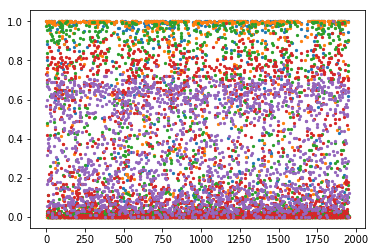

In [3]:
plt.scatter([i for i in range (1953)], y_pred_prob_mu, s = 5)
plt.scatter([i for i in range (1953)], y_pred_prob_be, s = 5)
plt.scatter([i for i in range (1953)], y_pred_prob_lo, s = 5)
plt.scatter([i for i in range (1953)], y_pred_prob_ra, s = 5)
plt.scatter([i for i in range (1953)], y_pred_prob_kn, s = 5)

In [4]:
mu = 1 
be = 0
lo = 0
ra = 0
kn = 0
weig_aver_prob = (mu*y_pred_prob_mu + be*y_pred_prob_be + lo*y_pred_prob_lo + ra*y_pred_prob_ra + kn*y_pred_prob_kn)/(mu + be + lo + ra + kn)
ave_pred = [0 if weig_aver_prob[i] < 0.5 else 1 for i in range(1953)]
D = pd.DataFrame({'id':[i for i in range(7921, 9874)], 'label':ave_pred})
D.to_csv('Result.csv', index=False)

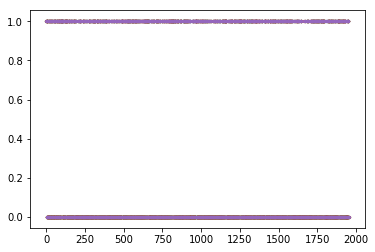

In [5]:
plt.scatter([i for i in range (1953)], y_pred_class_mu, s = 5)
plt.scatter([i for i in range (1953)], y_pred_class_be, s = 5)
plt.scatter([i for i in range (1953)], y_pred_class_lo, s = 5)
plt.scatter([i for i in range (1953)], y_pred_class_ra, s = 5)
plt.scatter([i for i in range (1953)], y_pred_class_kn, s = 5)

In [6]:
print (y_pred_class_mu.sum())
print (y_pred_class_be.sum())
print (y_pred_class_lo.sum())
print (y_pred_class_ra.sum())
print (y_pred_class_kn.sum())

578
527
523
604
694


In [7]:
# weig_agg_class = y_pred_class_mu + y_pred_class_be + y_pred_class_lo
# weig_agg_class = y_pred_class_mu + y_pred_class_be + y_pred_class_ra
# weig_agg_class = y_pred_class_mu + y_pred_class_lo + y_pred_class_ra
weig_agg_class = y_pred_class_mu + y_pred_class_be + y_pred_class_lo + y_pred_class_ra + y_pred_class_kn
print (weig_agg_class)
ave_pred = [0 if weig_agg_class[i] < 3 else 1 for i in range(1953)]
D = pd.DataFrame({'id':[i for i in range(7921, 9874)], 'label':ave_pred})
D.to_csv('Result.csv', index=False)

[5 1 5 ... 5 5 0]
